In [80]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import ensemble
from sklearn.model_selection import train_test_split

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

from nltk.corpus import gutenberg, stopwords

from sklearn.cluster import MeanShift, estimate_bandwidth

from sklearn.cluster import SpectralClustering

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import ensemble
import itertools
from sklearn.model_selection import train_test_split
import time
import numpy as np

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [2]:
#import nltk

In [3]:
#nltk.download("gutenberg")
#nltk.donwload("punkt")

In [4]:
# Import raw versions of text to view for cleaning
sense_raw = gutenberg.raw("austen-sense.txt")
cesar_raw = gutenberg.raw("shakespeare-caesar.txt")
blake_raw = gutenberg.raw("blake-poems.txt")
chesterton_raw = gutenberg.raw("chesterton-ball.txt")
edgeworth_raw = gutenberg.raw("edgeworth-parents.txt")
carroll_raw = gutenberg.raw("carroll-alice.txt")
bryant_raw = gutenberg.raw("bryant-stories.txt")
burgess_raw = gutenberg.raw("burgess-busterbrown.txt")
whitman_raw = gutenberg.raw("whitman-leaves.txt")


In [5]:
# Import text as paragraphs
sense = gutenberg.paras("austen-sense.txt")
cesar = gutenberg.paras("shakespeare-caesar.txt")
blake = gutenberg.paras("blake-poems.txt")
chesterton = gutenberg.paras("chesterton-ball.txt")
edgeworth = gutenberg.paras("edgeworth-parents.txt")
carroll = gutenberg.paras("carroll-alice.txt")
bryant = gutenberg.paras("bryant-stories.txt")
burgess = gutenberg.paras("burgess-busterbrown.txt")
whitman = gutenberg.paras("whitman-leaves.txt")


In [6]:
# See length of each text
print(len(sense))
print(len(cesar))
print(len(blake))
print(len(chesterton))
print(len(edgeworth))
print(len(carroll))
print(len(bryant))
print(len(burgess))
print(len(whitman))

1862
744
284
1606
3726
817
1194
266
2478


In [7]:
# Set max to use
max=750

In [8]:
# Modified text with a cap
sense = gutenberg.paras("austen-sense.txt")[0:max]
cesar = gutenberg.paras("shakespeare-caesar.txt")[0:max]
blake = gutenberg.paras("blake-poems.txt")[0:max]
chesterton = gutenberg.paras("chesterton-ball.txt")[0:max]
edgeworth = gutenberg.paras("edgeworth-parents.txt")[0:max]
carroll = gutenberg.paras("carroll-alice.txt")[0:max]
bryant = gutenberg.paras("bryant-stories.txt")[0:max]
burgess = gutenberg.paras("burgess-busterbrown.txt")[0:max]
whitman = gutenberg.paras("whitman-leaves.txt")[0:max]


In [9]:
# Final text length
print(len(sense))
print(len(cesar))
print(len(blake))
print(len(chesterton))
print(len(edgeworth))
print(len(carroll))
print(len(bryant))
print(len(burgess))
print(len(whitman))

750
744
284
750
750
750
750
266
750


In [10]:
#Look at raw text to determine cleaning needed
whitman_raw

'[Leaves of Grass by Walt Whitman 1855]\n\n\nCome, said my soul,\nSuch verses for my Body let us write, (for we are one,)\nThat should I after return,\nOr, long, long hence, in other spheres,\nThere to some group of mates the chants resuming,\n(Tallying Earth\'s soil, trees, winds, tumultuous waves,)\nEver with pleas\'d smile I may keep on,\nEver and ever yet the verses owning--as, first, I here and now\nSigning for Soul and Body, set to them my name,\n\nWalt Whitman\n\n\n\n[BOOK I.  INSCRIPTIONS]\n\n}  One\'s-Self I Sing\n\nOne\'s-self I sing, a simple separate person,\nYet utter the word Democratic, the word En-Masse.\n\nOf physiology from top to toe I sing,\nNot physiognomy alone nor brain alone is worthy for the Muse, I say\n    the Form complete is worthier far,\nThe Female equally with the Male I sing.\n\nOf Life immense in passion, pulse, and power,\nCheerful, for freest action form\'d under the laws divine,\nThe Modern Man I sing.\n\n\n\n}  As I Ponder\'d in Silence\n\nAs I pon

In [11]:
# Function to turn text into paragraphs and pass through vectorizer
def text_to_paragraphs(input, Author):
    output=[]
    text=input
    for paragraph in input:
        para=paragraph[0]
        #removing the double-dash from all words
        para=[re.sub(r'--','',word) for word in para]
        para=[re.sub("[\[].*?[\]]", "",word) for word in para]
        para=[re.sub(r"Chapter \d+", "",word) for word in para]
        para=[re.sub(r"CHAPTER .*", "",word) for word in para]
        para=[re.sub(r"Actus .*", "",word) for word in para]
        para=[re.sub(r"BOOK .", "",word) for word in para]

        
        #Forming each paragraph into a string and adding it to the list of strings.
        output.append(' '.join(para))
        
    X_train, X_test = train_test_split(output, test_size=0.25, random_state=0)

    vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                                 min_df=3,
                                 stop_words='english', 
                                 lowercase=True, 
                                 use_idf=True,
                                 norm=u'l2', 
                                 smooth_idf=True)


    #Applying the vectorizer
    output_tfidf=vectorizer.fit_transform(output)
    
    #splitting into training and test sets
    X_train_tfidf, X_test_tfidf= train_test_split(output_tfidf, test_size=0.25, random_state=0)


    #Reshapes the vectorizer output into something people can read
    X_train_tfidf_csr = X_train_tfidf.tocsr()

    #number of paragraphs
    n = X_train_tfidf_csr.shape[0]
    #A list of dictionaries, one per paragraph
    tfidf_bypara = [{} for _ in range(0,n)]
    #List of features
    terms = vectorizer.get_feature_names()
    #for each paragraph, lists the feature words and their tf-idf scores
    for i, j in zip(*X_train_tfidf_csr.nonzero()):
        tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

        #Our SVD data reducer.  
    svd= TruncatedSVD(36)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    # Run SVD on the training data, then project the training data.
    X_train_lsa = lsa.fit_transform(X_train_tfidf)

    variance_explained=svd.explained_variance_ratio_
    total_variance = variance_explained.sum()
    #print("Percent variance captured by all components:",total_variance*100)
    
    final_output=pd.DataFrame(X_train_lsa,index=X_train)
    final_output["Author"] = Author
    return(final_output)

In [12]:
# Run function on each text
sense_paragraphs= text_to_paragraphs(sense, "Austen")
cesar_paragraphs = text_to_paragraphs(cesar, "Shakespeare")
blake_paragraphs = text_to_paragraphs(blake, "Blake")
chesterton_paragraphs = text_to_paragraphs(chesterton, "Chesterton")
edgeworth_paragraphs = text_to_paragraphs(edgeworth, "Edgeworth")
carroll_paragraphs = text_to_paragraphs(carroll, "Carroll")
bryant_paragraphs = text_to_paragraphs(bryant, "Bryant")
burgess_paragraphs = text_to_paragraphs(burgess, "Burgess")
whitman_paragraphs = text_to_paragraphs(whitman, "Whitman")

In [13]:
def text_to_paragraphs2(input, Author):
    output=[]
    text=input
    for paragraph in input:
        para=paragraph[0]
        #removing the double-dash from all words
        para=[re.sub(r'--','',word) for word in para]
        para=[re.sub("[\[].*?[\]]", "",word) for word in para]
        para=[re.sub(r"Chapter \d+", "",word) for word in para]
        para=[re.sub(r"CHAPTER .*", "",word) for word in para]
        para=[re.sub(r"Actus .*", "",word) for word in para]
        para=[re.sub(r"BOOK .", "",word) for word in para]

        
        #Forming each paragraph into a string and adding it to the list of strings.
        output.append(' '.join(para))
    return(output)

In [14]:
sense_paragraphs2= text_to_paragraphs2(sense, "Austen")

In [15]:
sense_paragraphs2= text_to_paragraphs(sense, "Austen")

In [16]:
sense_paragraphs2[10]

" Elinor , for shame !"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  -5.657873e-02
Marianne felt for her most sincerely ; but she did more harm than good to the cause , by turning very red and saying in an angry manner to Margaret ,                                                                                                                                                                                                                                                                                                                                                    -2.72078

In [17]:
# Text list of what will be run through model
#text_list = []
text_list = [sense_paragraphs,
             cesar_paragraphs,
             blake_paragraphs,
             chesterton_paragraphs,
             edgeworth_paragraphs,
             carroll_paragraphs, 
             bryant_paragraphs,
             burgess_paragraphs,
             whitman_paragraphs
            ]

In [18]:
# Function to plot clusters
def plot_cluster(method,cluster,cluster_title):
    group_kmeans = method[method[cluster_title] == cluster]
    group_kmeans.plot.bar(x="Author", y="counts")

In [78]:
def print_model_output(input_model,x,y):
    model=input_model
    model.fit(x,y)
    score=model.score(x,y)
    print("Score %0.6f" % (score))
    print("Cross-Val-Score:")
    print(cross_val_score(model,x,y))
    #return score, test_score

In [19]:
sense_paragraphs

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Author
""" Elinor , for shame !""",5.116804e-01,2.261973e-06,-2.678916e-01,-4.280081e-01,-3.868141e-01,-3.059023e-01,2.521295e-01,4.930599e-02,-8.607231e-03,-2.113805e-01,...,6.136359e-02,1.897961e-02,-5.188808e-02,-3.908823e-02,-4.415240e-02,-4.330440e-02,-2.522056e-02,1.655645e-02,4.984689e-02,Austen
"Marianne felt for her most sincerely ; but she did more harm than good to the cause , by turning very red and saying in an angry manner to Margaret ,",2.935138e-01,-1.960224e-05,-8.623638e-02,2.855543e-01,-1.271298e-01,-9.384897e-02,-1.290056e-01,-3.664676e-02,2.607527e-01,-6.759454e-02,...,-2.271199e-01,-1.568198e-01,1.853872e-01,5.731876e-02,-6.018635e-02,-2.068499e-01,-3.736480e-02,-1.763502e-01,2.186218e-01,Austen
""" Upon my word ,"" replied Elinor , "" you know much more of the matter than I do , if you have any reason to expect such a match .""",3.274544e-01,1.265271e-05,-3.877811e-02,-2.825678e-01,-2.827766e-01,-1.006772e-01,-6.105803e-02,1.169081e-01,3.930523e-01,3.107854e-01,...,7.863186e-02,6.481407e-02,-1.793742e-01,2.650111e-02,-1.556068e-01,4.598636e-03,6.694549e-02,6.063969e-02,9.438938e-02,Austen
""" Of his sense and his goodness ,"" continued Elinor , "" no one can , I think , be in doubt , who has seen him often enough to engage him in unreserved conversation .",2.937976e-01,-1.021594e-05,-8.939667e-02,-1.258239e-01,-3.210418e-01,-1.344866e-01,1.867997e-02,-4.476630e-02,3.278978e-02,-1.318173e-01,...,3.099601e-02,5.057671e-02,2.468586e-01,-3.620091e-01,2.185166e-01,7.991280e-02,2.659395e-01,1.090924e-01,-1.213137e-01,Austen
""" I hope not ,"" he replied , trying to look cheerful ; and with a forced smile presently added , "" It is I who may rather expect to be ill for I am now suffering under a very heavy disappointment !""",1.377880e-01,4.412379e-06,3.514623e-02,-5.780108e-02,-2.600086e-01,-8.213316e-02,-1.530594e-01,7.795781e-02,-7.031909e-02,2.300042e-01,...,-2.611668e-01,1.417297e-01,3.589318e-02,4.351841e-02,9.329199e-02,2.763452e-01,3.338696e-01,2.283101e-02,-9.196969e-02,Austen
""" I never saw you wear a ring before , Edward ,"" she cried .",1.227126e-01,-8.878580e-06,3.110381e-02,1.340775e-01,-1.764157e-01,-4.636580e-02,-8.431433e-02,7.472152e-02,-2.664614e-01,5.353311e-01,...,3.833202e-02,-3.636874e-02,-8.427961e-02,5.125738e-02,5.757735e-02,1.463092e-01,-1.444701e-02,-5.274931e-02,1.484471e-01,Austen
""" A mighty concession indeed !",-2.665153e-03,1.421624e-03,-4.493002e-03,2.161517e-02,-1.074295e-01,1.180989e-01,1.331639e-01,3.152120e-01,-7.666596e-02,-2.357121e-02,...,-1.412111e-01,1.986495e-02,1.426663e-01,-7.234750e-02,-1.631889e-01,-7.857561e-02,1.554948e-02,-7.773267e-02,-6.183658e-02,Austen
"An opportunity was soon to be given to the Dashwoods of debating on the rest of the children , as Sir John would not leave the house without securing their promise of dining at the park the next day .",1.924206e-01,-3.798036e-06,5.268445e-01,2.136189e-01,-1.006188e-01,-2.167777e-01,3.113541e-01,1.046526e-01,-6.083849e-02,-6.150775e-02,...,-9.471059e-02,1.911841e-01,-2.193329e-01,2.612025e-02,5.624639e-02,1.490518e-01,5.862631e-02,-1.038347e-02,3.871265e-02,Austen
""" My dear ,"" said he to his lady , "" it is very provoking that we should be so few .",3.674524e-01,-2.905719e-06,1.025637e-01,-1.303760e-01,2.600223e-01,3.226965e-01,-1.296944e-01,-1.847357e-01,-2.342716e-01,-2.149734e-01,...,-3.261224e-02,-5.561371e-03,-3.327636e-02,2.288518e-03,5.082068e-02,7.075798e-02,1.773152e-02,-3.022099e-02,2.755345e-02,Austen
"As a house , Barton Cottage , though small , was comfortable and compact ; but as a cottage it was defective , for the building was regular , the roof was tiled , the window shutters were not painted green , nor were the walls covered with honeysuckles .",6.983451e-02,1.084373e-05,1.245892e-01,1.984307e-02,-1.600740e-01,-5.410967e-02,-9.053855e-02,3.784769e-02,-4.102858e-02,-6.020618e-02,...,-3.917327e-01,2.336378e-01,7.550397e-02,-2.967971e-02

In [20]:
start = pd.DataFrame()
combined=start.append(text_list)

#Create x and y for modeling

clustering_x = combined.drop(["Author"],axis=1)
clustering_y=pd.DataFrame()

Text(0.5,1,'Elbow curve')

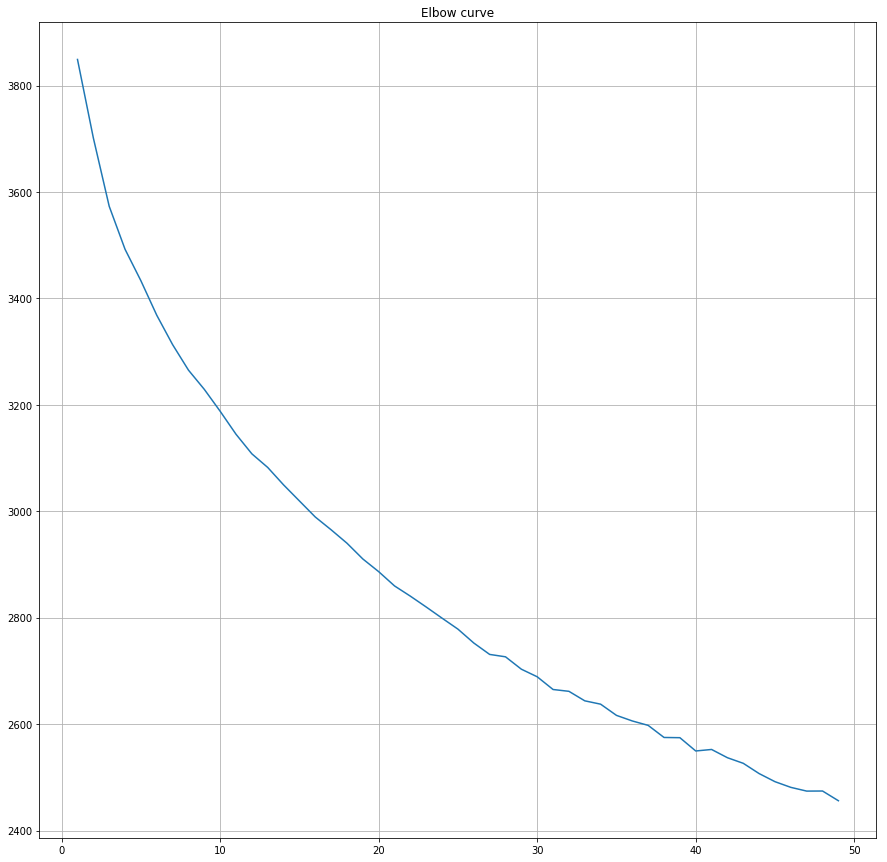

In [21]:
# Elbow for determining number of clusters
distorsions = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(clustering_x)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 15))
plt.plot(range(1, 50), distorsions)
plt.grid(True)
plt.title('Elbow curve')

### K - Means

In [22]:
# K-Means clustering
cluster_count = 22

start = pd.DataFrame()
combined=start.append(text_list)

#Create x and y for modeling

clustering_x = combined.drop(["Author"],axis=1)
clustering_y=pd.DataFrame()

clustering_y["Author"] = combined["Author"]
clustering_y= clustering_y["Author"].tolist()

# Run K-Means 
y_pred_kmeans = KMeans(n_clusters=cluster_count, random_state=47).fit_predict(clustering_x)

# Create final dataframe

final_df=pd.DataFrame()
final_df["Author"] = combined["Author"]
final_df["cluster"] = y_pred_kmeans

# Create dataframe for plotting 

grouped_kmeans = final_df.groupby(by=['cluster','Author']).size().reset_index(name="counts")

In [23]:
# K-Means Adjusted Rand Index
metrics.adjusted_rand_score(clustering_y, y_pred_kmeans)

0.019352435086834482

C:\Users\shaba\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


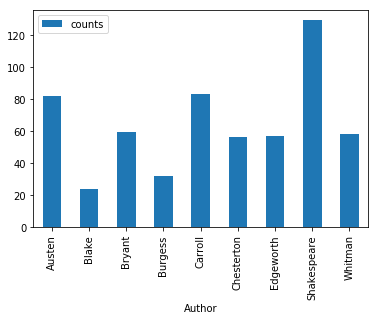

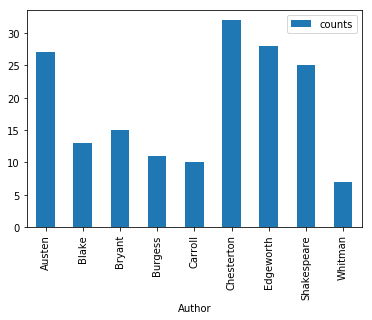

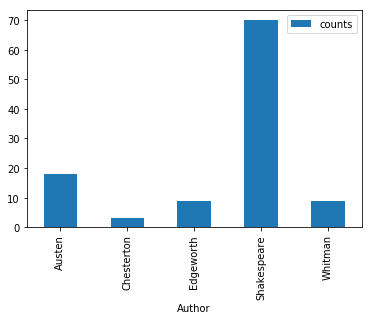

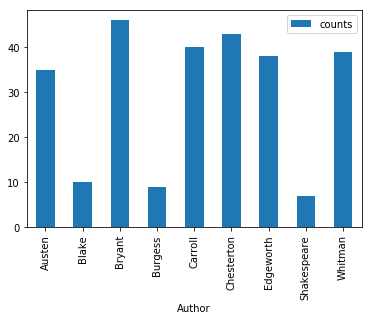

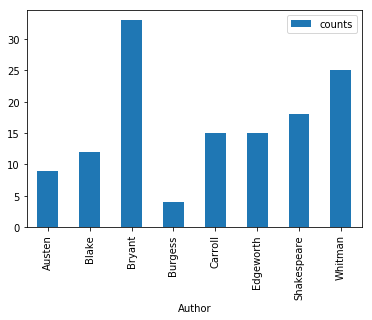

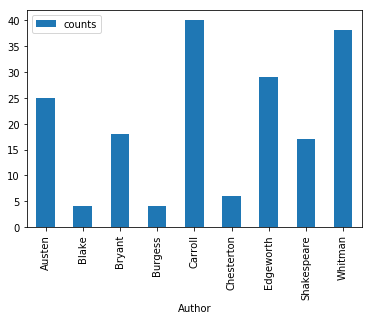

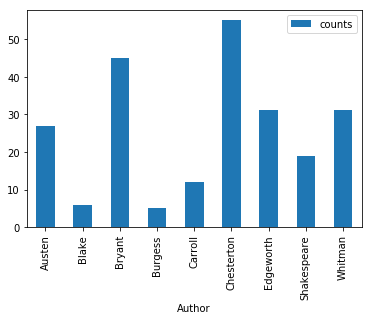

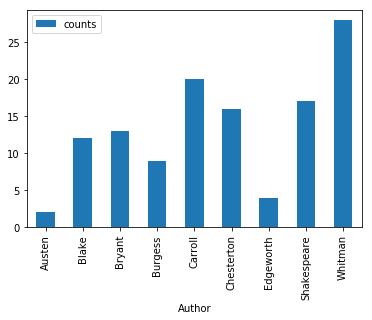

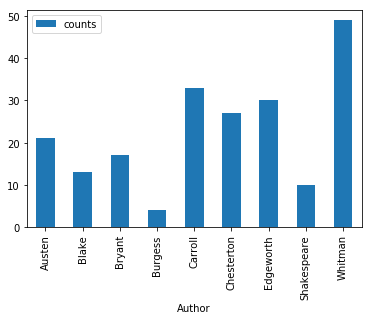

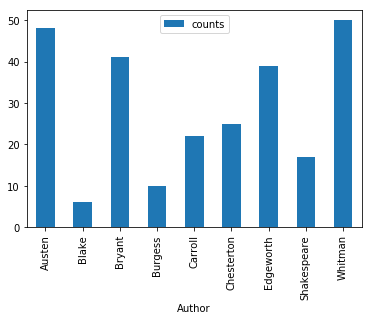

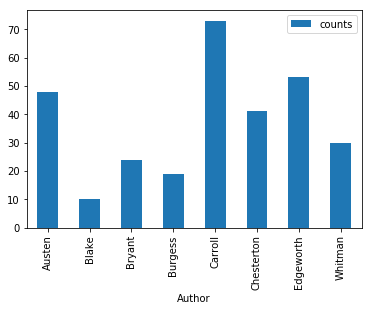

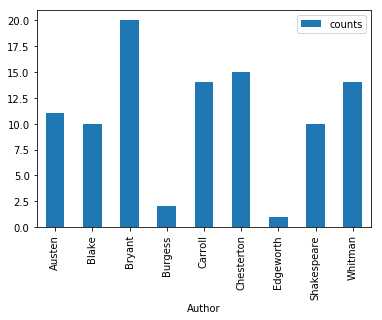

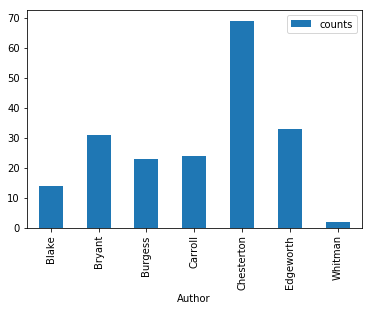

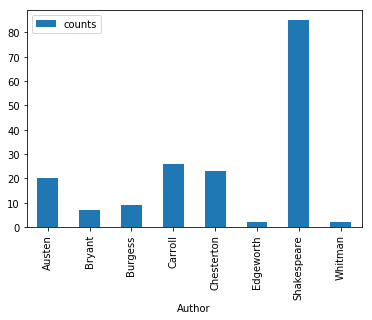

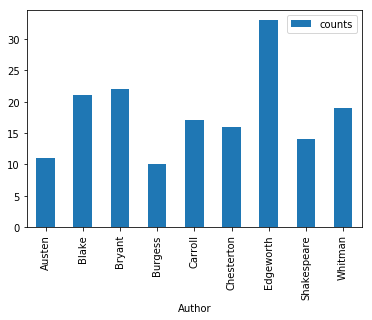

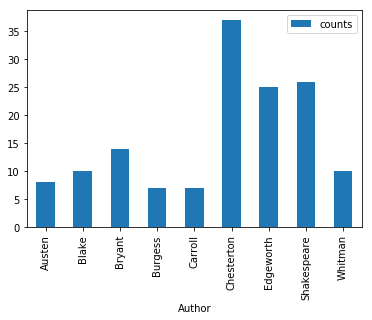

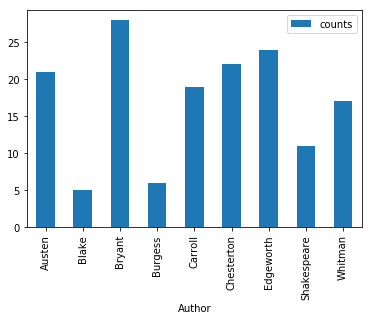

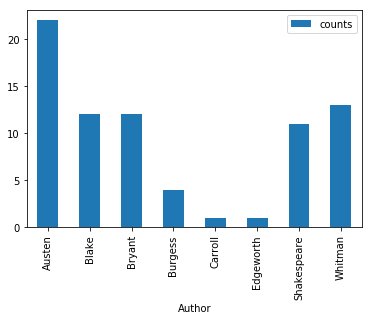

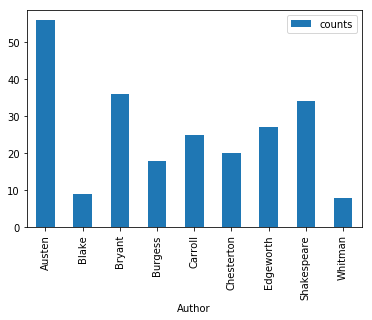

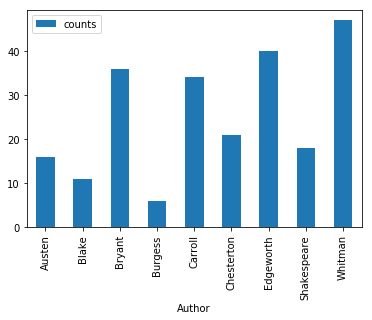

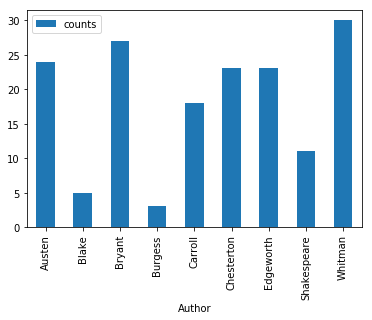

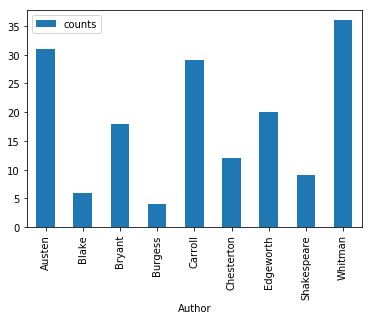

In [24]:
# Plot K-Means clusters
number_of_clusters = range(0,cluster_count)
for number in number_of_clusters:
    plot_cluster(grouped_kmeans,number,"cluster")

In [25]:
# K-Means clustering
cluster_count = 16

start = pd.DataFrame()
combined=start.append(text_list)

#Create x and y for modeling

clustering_x = combined.drop(["Author"],axis=1)
clustering_y=pd.DataFrame()

clustering_y["Author"] = combined["Author"]
clustering_y= clustering_y["Author"].tolist()

# Run K-Means 
y_pred_kmeans = KMeans(n_clusters=cluster_count, random_state=47).fit_predict(clustering_x)

# Create final dataframe

final_df=pd.DataFrame()
final_df["Author"] = combined["Author"]
final_df["cluster"] = y_pred_kmeans

# Create dataframe for plotting 

grouped_kmeans = final_df.groupby(by=['cluster','Author']).size().reset_index(name="counts")

### TF-IDF Supervised

In [81]:
#KNN
print_model_output(KNeighborsClassifier(),clustering_x, clustering_y)

Score 0.922616
Cross-Val-Score:
[ 0.86225895  0.84982699  0.84290657]


In [86]:
#Logistic Regression
print_model_output(LogisticRegression(C=1e09,penalty="l2"), clustering_x, clustering_y)

Score 0.325196
Cross-Val-Score:
[ 0.29201102  0.29965398  0.3100346 ]


In [87]:
estimators= (10,100,500)
start_time = time.time()
for estimator in estimators:
    print("Estimator: %0.f" %(estimator))
    print_model_output(ensemble.RandomForestClassifier(n_estimators=estimator,max_features="auto"),clustering_x, clustering_y)

Estimator: 10
Score 0.950484
Cross-Val-Score:
[ 0.77548209  0.77301038  0.76608997]
Estimator: 100
Score 0.951175
Cross-Val-Score:
[ 0.85812672  0.86435986  0.85259516]
Estimator: 500
Score 0.951175
Cross-Val-Score:
[ 0.86570248  0.88373702  0.86435986]


### Mean Shift

In [26]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(clustering_x, quantile=0.3, n_samples=10000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(clustering_x)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 1


### Spectral Clustering

In [27]:
# Spectral clustering with elbow suggested 11 clusters

n_clusters=23

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(clustering_x)

#Predicted clusters.
sc_predict=sc.fit_predict(clustering_x)


In [28]:
# K-Means Adjusted Rand Index
metrics.adjusted_rand_score(clustering_y, sc_predict)

0.015605941103597422

In [29]:
final_df["sc_cluster"] = sc_predict

# Create dataframe for plotting 

grouped_sc = final_df.groupby(by=['sc_cluster','Author']).size().reset_index(name="counts")

C:\Users\shaba\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


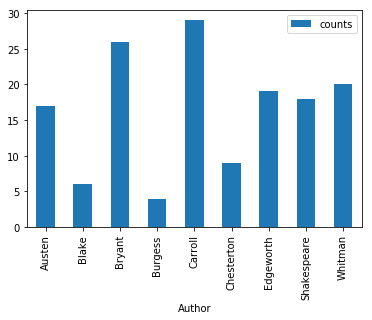

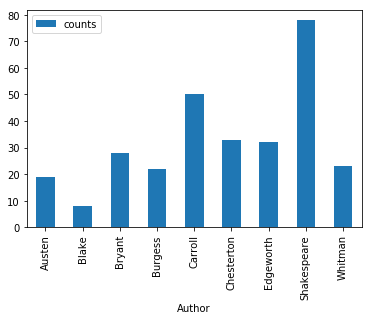

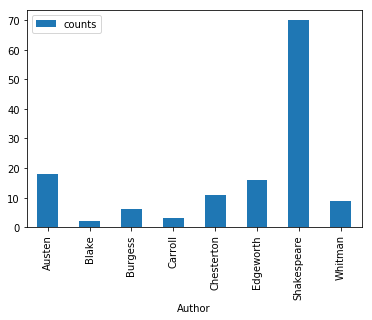

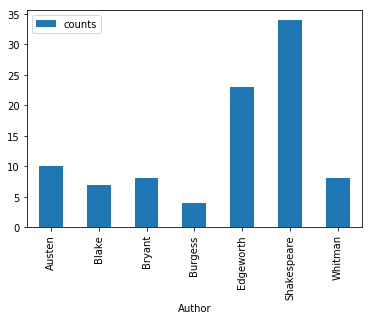

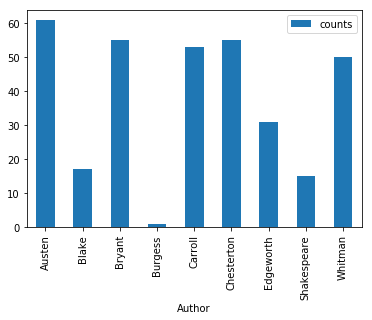

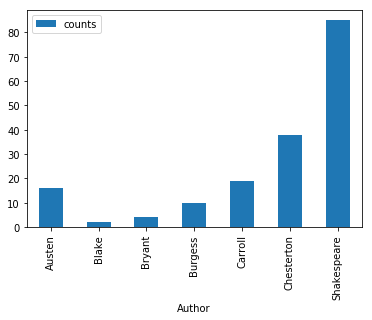

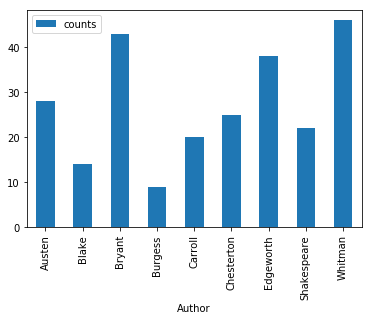

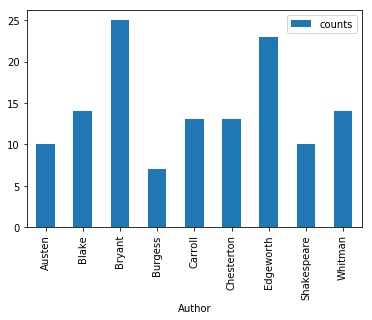

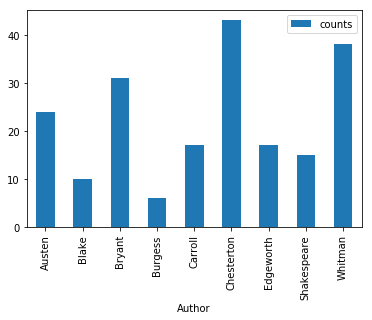

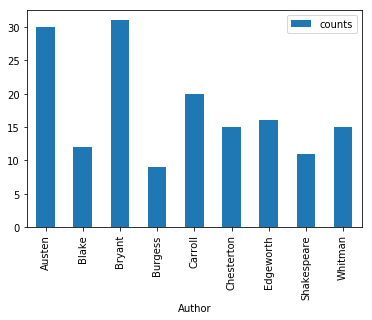

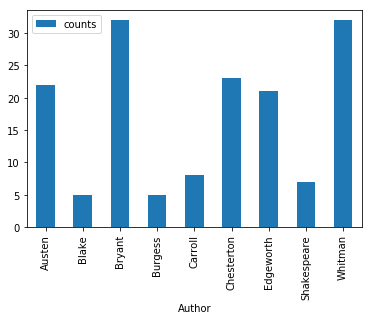

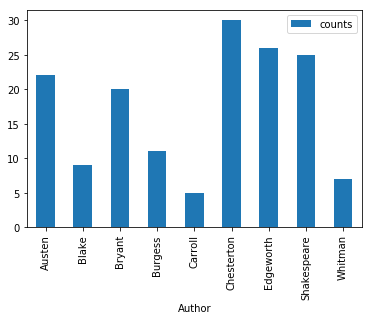

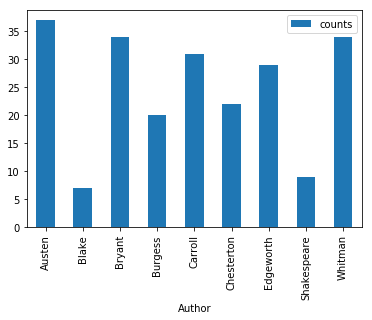

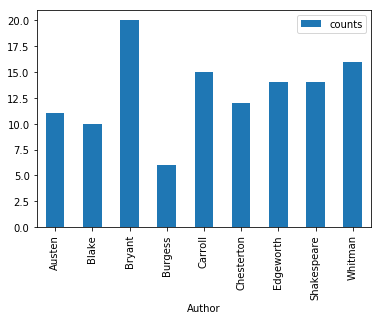

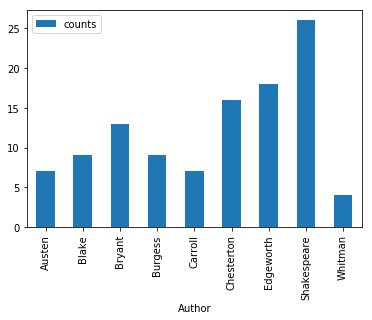

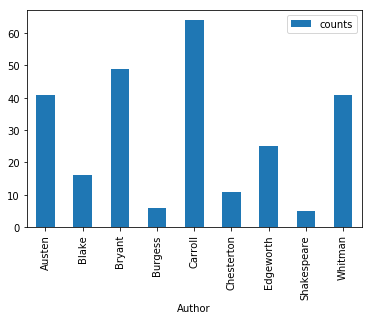

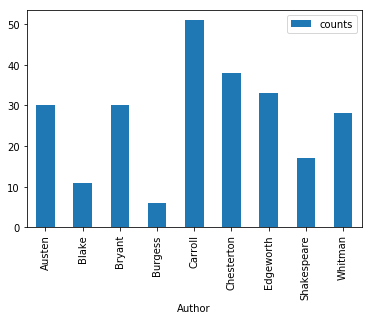

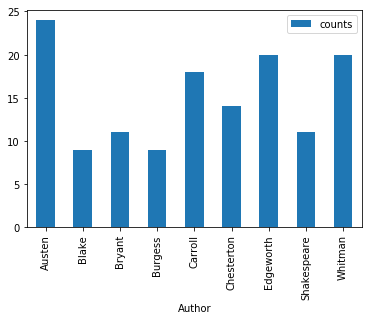

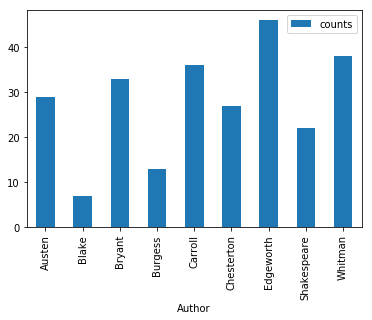

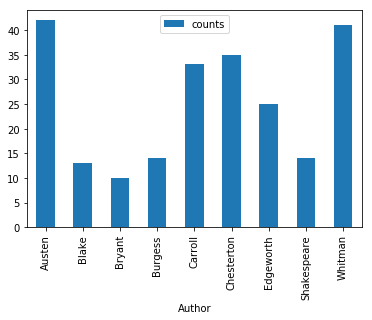

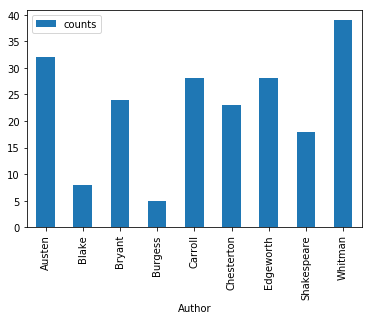

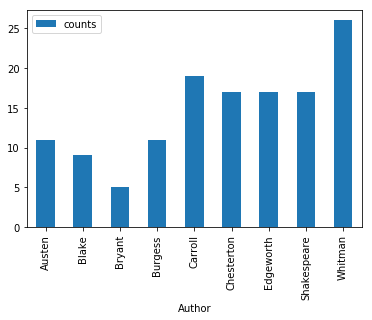

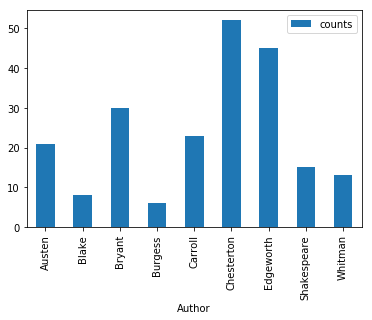

In [30]:
# Plot clusters
number_of_clusters = range(0,n_clusters)
for number in number_of_clusters:
    plot_cluster(grouped_sc,number,"sc_cluster")

### Affinity Propogation

In [31]:
af_predict = AffinityPropagation().fit_predict(clustering_x)

In [32]:
# K-Means Adjusted Rand Index
metrics.adjusted_rand_score(clustering_y, af_predict)

0.025089512891029141

In [33]:
af_predict.max()

599

In [34]:
author = final_df["Author"]
spectral = final_df['sc_cluster']

In [35]:
final_df

,Author,cluster,sc_cluster
""" Elinor , for shame !""",Austen,14,4
"Marianne felt for her most sincerely ; but she did more harm than good to the cause , by turning very red and saying in an angry manner to Margaret ,",Austen,6,10
""" Upon my word ,"" replied Elinor , "" you know much more of the matter than I do , if you have any reason to expect such a match .""",Austen,13,20
""" Of his sense and his goodness ,"" continued Elinor , "" no one can , I think , be in doubt , who has seen him often enough to engage him in unreserved conversation .",Austen,2,15
""" I hope not ,"" he replied , trying to look cheerful ; and with a forced smile presently added , "" It is I who may rather expect to be ill for I am now suffering under a very heavy disappointment !""",Austen,13,20
""" I never saw you wear a ring before , Edward ,"" she cried .",Austen,13,17
""" A mighty concession indeed !",Austen,0,7
"An opportunity was soon to be given to the Dashwoods of debating on the rest of the children , as Sir John would not leave the house without securing their promise of dining at the park the next day .",Austen,12,16
""" My dear ,"" said he to his lady , "" it is very provoking that we should be so few .",Austen,1,12
"As a house , Barton Cottage , though small , was comfortable and compact ; but as a cottage it was defective , for the building was regular , the roof was tiled , the window shutters were not painted green , nor were the walls covered with honeysuckles .",Austen,8,15


In [36]:
import spacy
nlp = spacy.load("en")


In [37]:
# Final text length
sense_bow= nlp(sense_raw)
cesar_bow= nlp(cesar_raw)
blake_bow=nlp(blake_raw)
chesterton_bow = nlp(chesterton_raw)
edgeworth_bow = nlp(edgeworth_raw)
carroll_bow = nlp(carroll_raw)
bryant_bow = nlp(bryant_raw)
burgess_bow = nlp(burgess_raw)
whitman_bow = nlp(burgess_raw)

In [38]:
# Clean the text
def text_cleaner(text):
    text = text.apply(lambda x:re.sub("</br></br>", " ", x))
    text = text.apply(lambda x:re.sub("---", " ", x))
    text = text.apply(lambda x:re.sub("--", " ", x))
    text = text.apply(lambda x:re.sub("<", " ", x))
    text = text.apply(lambda x:re.sub(";", " ", x))
    text = text.apply(lambda x:re.sub(";", " ", x))
    text = text.apply(lambda x:re.sub("ÛÏ", " ", x))
    text = text.apply(lambda x:re.sub("Ûª", " ", x))
    text = text.apply(lambda x:re.sub("Û", " ", x))
    text = text.apply(lambda x:re.sub("ûó", " ", x))
    text = text.apply(lambda x:re.sub("ÛÓ", " ", x))
    text = text.apply(lambda x:re.sub("\x89ûó", " ", x))
    text = text.apply(lambda x:re.sub("x89ûó", " ", x))
    text = text.apply(lambda x:re.sub("\x89ðê", " ", x))  
    text = text.apply(lambda x:re.sub("Author:", " ", x))
    text = text.apply(lambda x:re.sub("By:", " ", x))
    text = text.apply(lambda x:re.sub("\d+","",x))    
    text = text.apply(lambda x:re.sub("'","",x)) 
    text = text.apply(lambda x:re.sub("  ","",x)) 
    text = text.apply(lambda x:re.sub("\\\\","",x))  
    text = text.apply(lambda x:re.sub("/","",x))  
    text = text.apply(lambda x:re.sub("-", " ", x))
    text = text.apply(lambda x:re.sub("\+", " ", x))
    return text

In [39]:
def word_frequencies(text, include_stop=True):
    words = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            words.append(token.text)
    return Counter(words)


In [40]:
word_frequencies(sense_bow, include_stop=False).most_common(20)

[('\n', 10775),
 ('I', 1984),
 ('\n\n', 1741),
 (' ', 1723),
 ("'s", 698),
 ('Elinor', 679),
 ('Marianne', 564),
 ('Mrs.', 526),
 ('said', 392),
 ('But', 283),
 ('sister', 280),
 ('mother', 257),
 ('She', 257),
 ('Edward', 257),
 ('Dashwood', 252),
 ('The', 242),
 ('time', 236),
 ('Jennings', 229),
 ('know', 228),
 ('Willoughby', 213)]

In [41]:
# Utility function to create a list of the 2000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(500)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.



In [42]:
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

In [43]:
# Final text length
sense_words= bag_of_words(sense_bow)
cesar_words= bag_of_words(cesar_bow)
blake_words=bag_of_words(blake_bow)
chesterton_words = bag_of_words(chesterton_bow)
edgeworth_words = bag_of_words(edgeworth_bow)
carroll_words = bag_of_words(carroll_bow)
bryant_words = bag_of_words(bryant_bow)
burgess_words = bag_of_words(burgess_bow)
whitman_words = bag_of_words(burgess_bow)

common_words = set(sense_words + cesar_words + blake_words + chesterton_words + edgeworth_words + carroll_words
                  + bryant_words + whitman_words)

In [44]:
combined_reset = combined.reset_index()
bow_df = pd.DataFrame()
bow_df["Text"] = combined_reset["index"]
bow_df["Author"] = combined_reset["Author"]
bow_df = bow_df
bow_df.head()

,Text,Author
0,""" Elinor , for shame !""",Austen
1,Marianne felt for her most sincerely ; but she...,Austen
2,""" Upon my word ,"" replied Elinor , "" you know ...",Austen
3,""" Of his sense and his goodness ,"" continued E...",Austen
4,""" I hope not ,"" he replied , trying to look ch...",Austen


In [45]:
type(sense_bow)

spacy.tokens.doc.Doc

In [46]:
sense_bow_sents = [[sent , "Austen"] for sent in sense_bow.sents]
cesar_bow_sents = [[sent , "Shakespeare"] for sent in cesar_bow.sents]
blake_bow_sents = [[sent , "Blake"] for sent in blake_bow.sents]
chesterton_bow_sents = [[sent , "Chesterton"] for sent in chesterton_bow.sents]
edgeworth_bow_sents = [[sent , "Edgeworth"] for sent in edgeworth_bow.sents]
carroll_bow_sents = [[sent , "Carroll"] for sent in carroll_bow.sents]
bryant_bow_sents = [[sent , "Bryant"] for sent in bryant_bow.sents]
burgess_bow_sents = [[sent , "Burgess"] for sent in burgess_bow.sents]
whitman_bow_sents = [[sent , "Whitman"] for sent in whitman_bow.sents]

In [47]:
print(len(sense_bow_sents))
print(len(cesar_bow_sents))
print(len(blake_bow_sents))
print(len(chesterton_bow_sents))
print(len(edgeworth_bow_sents))
print(len(carroll_bow_sents))
print(len(bryant_bow_sents))
print(len(burgess_bow_sents))
print(len(whitman_bow_sents))

5499
2359
507
4889
10610
1705
2872
1056
1056


In [48]:
sents_max = 1500

In [49]:
sense_bow_sents = sense_bow_sents[0:sents_max]
cesar_bow_sents = cesar_bow_sents[0:sents_max]
blake_bow_sents = blake_bow_sents[0:sents_max]
chesterton_bow_sents = chesterton_bow_sents[0:sents_max]
edgeworth_bow_sents = edgeworth_bow_sents[0:sents_max]
carroll_bow_sents = carroll_bow_sents[0:sents_max]
bryant_bow_sents = bryant_bow_sents[0:sents_max]
burgess_bow_sents = burgess_bow_sents[0:sents_max]
whitman_bow_sents = whitman_bow_sents[0:sents_max]

In [50]:
print(len(sense_bow_sents))
print(len(cesar_bow_sents))
print(len(blake_bow_sents))
print(len(chesterton_bow_sents))
print(len(edgeworth_bow_sents))
print(len(carroll_bow_sents))
print(len(bryant_bow_sents))
print(len(burgess_bow_sents))
print(len(whitman_bow_sents))

1500
1500
507
1500
1500
1500
1500
1056
1056


In [63]:
bow_text_list = [sense_bow_sents,
             cesar_bow_sents,
             blake_bow_sents,
             chesterton_bow_sents,
             edgeworth_bow_sents,
             carroll_bow_sents, 
             bryant_bow_sents,
             burgess_bow_sents,
             whitman_bow_sents
            ]

In [51]:
combined_bow_sents = pd.DataFrame(sense_bow_sents + cesar_bow_sents + blake_bow_sents + chesterton_bow_sents + 
                      edgeworth_bow_sents + carroll_bow_sents + bryant_bow_sents + burgess_bow_sents + whitman_bow_sents)

In [52]:
combined_bow_sents.head()

,0,1
0,"([, Sense, and, Sensibility, by, Jane, Austen,...",Austen
1,"(Their, estate, was, large, ,, and, their, res...",Austen
2,"(The, late, owner, of, this, estate, was, a, s...",Austen
3,"(But, her, death, ,, which, happened, ten, yea...",Austen
4,"(In, the, society, of, his, nephew, and, niece...",Austen


In [60]:
len(combined_bow_sents)

11619

In [53]:
word_counts = bow_features(combined_bow_sents,common_words)

Processing row 0
Processing row 500
Processing row 1000
Processing row 1500
Processing row 2000
Processing row 2500
Processing row 3000
Processing row 3500
Processing row 4000
Processing row 4500
Processing row 5000
Processing row 5500
Processing row 6000
Processing row 6500
Processing row 7000
Processing row 7500
Processing row 8000
Processing row 8500
Processing row 9000
Processing row 9500
Processing row 10000
Processing row 10500
Processing row 11000
Processing row 11500


In [54]:
word_counts.head()

,however,heare,lobster,minde,pop,never,prey,fly,no,disappointment,...,funerall,shine,mary,acquaintance,angle,lane,mane,portia,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"([, Sense, and, Sensibility, by, Jane, Austen,...",Austen
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,"(Their, estate, was, large, ,, and, their, res...",Austen
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(The, late, owner, of, this, estate, was, a, s...",Austen
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(But, her, death, ,, which, happened, ten, yea...",Austen
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(In, the, society, of, his, nephew, and, niece...",Austen


In [62]:
print(len(word_counts))
print(len(y_pred_kmeans_bow))
print(len(final_bow_df))
print(len(bow_combined))

11619
11619
4342
4342


In [72]:
bow_combined.head()

,0,1
0,"([, Sense, and, Sensibility, by, Jane, Austen,...",Austen
1,"(Their, estate, was, large, ,, and, their, res...",Austen
2,"(The, late, owner, of, this, estate, was, a, s...",Austen
3,"(But, her, death, ,, which, happened, ten, yea...",Austen
4,"(In, the, society, of, his, nephew, and, niece...",Austen


In [71]:
# K-Means clustering
cluster_count = 22

bow_start = pd.DataFrame()
bow_combined=bow_start.append(combined_bow_sents)

#Create x and y for modeling

bow_clustering_x = word_counts.drop(["text_sentence","text_source"],axis=1)
bow_clustering_y=pd.DataFrame()

bow_clustering_y["Author"] = word_counts["text_source"]
bow_clustering_y= bow_clustering_y["Author"].tolist()

# Run K-Means 
y_pred_kmeans_bow = KMeans(n_clusters=cluster_count, random_state=47).fit_predict(bow_clustering_x)

# Create final dataframe

final_bow_df=pd.DataFrame()
final_bow_df["Author"] = bow_combined[1]
final_bow_df["cluster"] = y_pred_kmeans_bow

# Create dataframe for plotting 

grouped_bow_kmeans = final_bow_df.groupby(by=['cluster','Author']).size().reset_index(name="counts")

In [74]:
# K-Means Adjusted Rand Index
metrics.adjusted_rand_score(bow_clustering_y, y_pred_kmeans_bow)

0.075904265419983824

###  BOW Mean Shift

In [75]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(bow_clustering_x, quantile=0.3, n_samples=10000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(bow_clustering_x)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 61


In [77]:
# BOW Mean Shift Adjusted Rand Index
metrics.adjusted_rand_score(bow_clustering_y, labels)

0.00042293029023016604

### BOW Spectral

In [76]:
# Spectral clustering with elbow suggested 11 clusters

n_clusters=22

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(bow_clustering_x)

#Predicted clusters.
bow_sc_predict=sc.fit_predict(bow_clustering_x)




KeyboardInterrupt: 

In [ ]:
# K-Means Adjusted Rand Index
metrics.adjusted_rand_score(bow_clustering_y, bow_sc_predict)

### BOW Supervised

In [88]:
#KNN
print_model_output(KNeighborsClassifier(),bow_clustering_x, bow_clustering_y)

Score 0.644031
Cross-Val-Score:
[ 0.4771495   0.51794475  0.45468629]


In [89]:
#Logistic Regression
print_model_output(LogisticRegression(C=1e09,penalty="l2"), bow_clustering_x, bow_clustering_y)

Score 0.858163
Cross-Val-Score:
[ 0.60056804  0.6390395   0.58430158]


In [ ]:
estimators= (10,100,500)
start_time = time.time()
for estimator in estimators:
    print("Estimator: %0.f" %(estimator))
    print_model_output(ensemble.RandomForestClassifier(n_estimators=estimator,max_features="auto"),bow_clustering_x, bow_clustering_y)

Estimator: 10
Score 0.880196
Cross-Val-Score:
[ 0.58739995  0.62483863  0.57758843]
Estimator: 100
Score 0.885446
Cross-Val-Score:
[ 0.62070746  0.64962561  0.59411309]
Estimator: 500
Score 0.885446
Cross-Val-Score:
[ 0.61476891  0.65427317  0.59824426]


In [ ]:
#KNN
print_model_output(KNeighborsClassifier(),bow_clustering_x, bow_clustering_y)

In [ ]:
#Logistic Regression
print_model_output(LogisticRegression(C=1e09,penalty="l2"), bow_clustering_x, bow_clustering_y)

In [ ]:
estimators= (10,100,500)
start_time = time.time()
for estimator in estimators:
    print("Estimator: %0.f" %(estimator))
    print_model_output(ensemble.RandomForestClassifier(n_estimators=estimator,max_features="auto"),bow_clustering_x, bow_clustering_y)